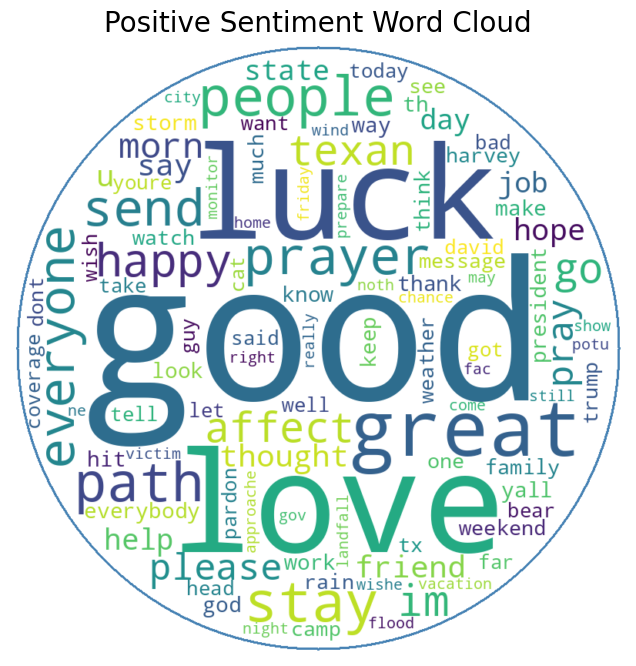

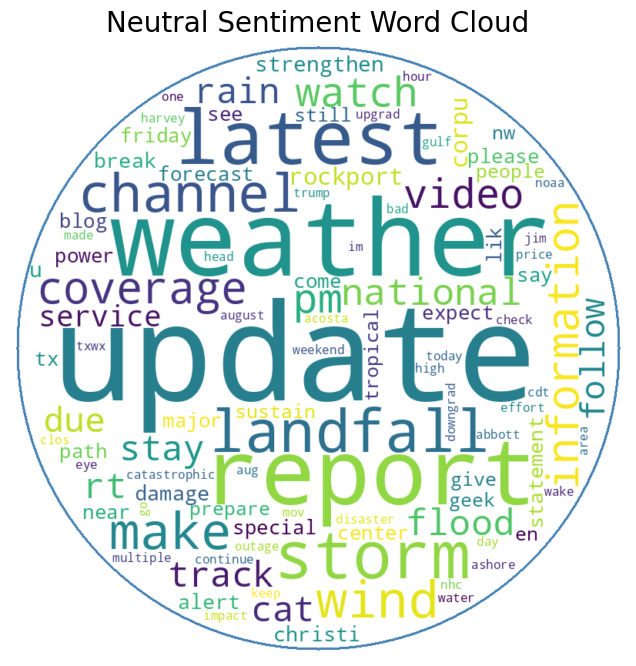

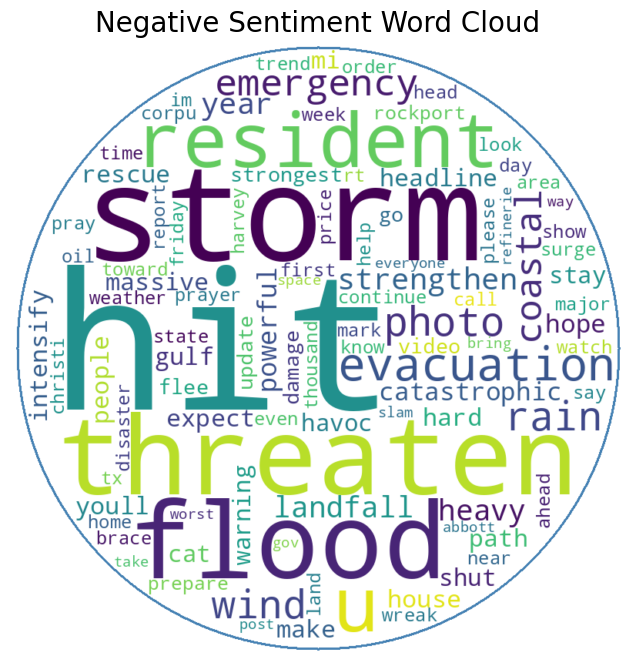

In [ ]:
# Making three word clouds including positive, neutral, and negative word cloud

import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Define the manual stopwords list, including additional unwanted words
manual_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by',
    'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
    'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
    'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
    'will', 'just', 'don', 'should', 'now',
    'donald', 'trump', 'realdonaldtrump', 'texas', 'harvey', 'hurricane', 'youtube', 'cnn',
    'new', 'abc', 'fox', 'nyt', 'york', 'south', 'mph', 'brockport', 'safe', 'port', 'headline',
    'official', 'southern', 'orlean', 'time', 'fema', 'texan', 'hurricaneharvey', 'foxnews',
    'nbc', 'msnbc', 'cbs', 'nbcnews', 'cbsnews', 'bbc', 'television', 'tv', 'netflix', 'news',
    'youtuber', 'york', 'la', 'ny', 'los', 'angeles', 'miami', 'austin', 'houston', 'dallas',
    'florida', 'california', 'louisiana', 'georgia', 'carolina', 'mexico', 'america', 'american',
    'coast', 'via', 'photo', 'live', 'resident', 'white', 'category'
])

# Simplified lemmatization function
def simple_lemmatize(word):
    suffixes = ['ing', 'ed', 's']
    for suffix in suffixes:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

# Function to clean tweet text using the advanced cleaning method
def clean_tweet_advanced(tweet):
    if not isinstance(tweet, str):
        return ''
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'www\S+', '', tweet)   # Remove URLs
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)  # Remove special characters and numbers
    tweet = tweet.lower()  # Convert to lowercase
    tweet = tweet.split()  # Split into words
    tweet = [word for word in tweet if len(word) > 1]  # Remove single-character tokens
    tweet = [word for word in tweet if word not in manual_stopwords]  # Remove stopwords
    tweet = [simple_lemmatize(word) for word in tweet]  # Simplified lemmatization
    tweet = ' '.join(tweet)  # Join words back into a single string
    return tweet

# Load the dataset
data = pd.read_csv('Hurricane_Harvey.csv', encoding='ISO-8859-1')

# Apply the advanced cleaning function to the dataset
data['Cleaned_Tweet'] = data['Tweet'].apply(clean_tweet_advanced)

# Define the specific lists of positive, neutral, and negative keywords
positive_keywords = ['love', 'great', 'happy', 'good', 'wonderful', 'blessed', 'safe', 'joy']
neutral_keywords = ['update', 'news', 'information', 'report', 'weather']
negative_keywords = [
    'shut', 'class', 'americans', 'buildings', 'sleep', 'weird', 'spell', 'mark', 'downgrade',
    'coastal', 'idea', 'hit', 'drench', 'trend', 'massive', 'rescue', 'havoc', 'evacuation',
    'warning', 'horrific', 'resident', 'threaten', 'destructive', 'photo', 'heavy', 'history',
    'intensify', 'port', 'old', 'new', 'emergency'
]

# Function to classify sentiment based on the keywords
def classify_sentiment(tweet):
    words = set(tweet.split())
    if words.intersection(positive_keywords):
        return 'positive'
    elif words.intersection(negative_keywords):
        return 'negative'
    elif words.intersection(neutral_keywords):
        return 'neutral'
    else:
        return 'other'

# Apply the sentiment classification to the cleaned tweets
data['Sentiment'] = data['Cleaned_Tweet'].apply(classify_sentiment)

# Extract cleaned tweets by sentiment
positive_tweets = ' '.join(data[data['Sentiment'] == 'positive']['Cleaned_Tweet'])
neutral_tweets = ' '.join(data[data['Sentiment'] == 'neutral']['Cleaned_Tweet'])
negative_tweets = ' '.join(data[data['Sentiment'] == 'negative']['Cleaned_Tweet'])

# Create a mask for circular shape
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 390 ** 2
mask = 255 * mask.astype(int)

# Function to create a circular word cloud with limited words
def create_circular_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800, height=800, background_color='white',
        contour_width=3, contour_color='steelblue',
        max_words=100,  # Include more words
        mask=mask,
        collocations=False
    ).generate(text)

    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis('off')
    plt.show()

# Generate and display the circular word clouds for positive, neutral, and negative tweets
create_circular_wordcloud(positive_tweets, 'Positive Sentiment Word Cloud')
create_circular_wordcloud(neutral_tweets, 'Neutral Sentiment Word Cloud')
create_circular_wordcloud(negative_tweets, 'Negative Sentiment Word Cloud')


In [2]:
# Making Life Incidents Key terms opic

import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

# Define the manual stopwords list, including additional unwanted words
manual_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by',
    'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
    'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
    'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
    'will', 'just', 'don', 'should', 'now',
    'donald', 'trump', 'realdonaldtrump', 'texas', 'harvey', 'hurricane', 'youtube', 'cnn',
    'new', 'abc', 'fox', 'nyt', 'york', 'south', 'mph', 'brockport', 'safe', 'port', 'headline',
    'official', 'southern', 'orlean', 'time', 'fema', 'texan', 'hurricaneharvey', 'foxnews',
    'nbc', 'msnbc', 'cbs', 'nbcnews', 'cbsnews', 'bbc', 'television', 'tv', 'netflix', 'news',
    'youtuber', 'york', 'la', 'ny', 'los', 'angeles', 'miami', 'austin', 'houston', 'dallas',
    'florida', 'california', 'louisiana', 'georgia', 'carolina', 'mexico', 'america', 'american',
    'coast', 'via', 'photo', 'live', 'resident', 'white', 'category'
])

# Convert the set of stopwords to a list
manual_stopwords = list(manual_stopwords)

# Simplified lemmatization function
def simple_lemmatize(word):
    suffixes = ['ing', 'ed', 's']
    for suffix in suffixes:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

# Function to clean tweet text using the advanced cleaning method
def clean_tweet_advanced(tweet):
    if not isinstance(tweet, str):
        return ''
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'www\S+', '', tweet)   # Remove URLs
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)  # Remove special characters and numbers
    tweet = tweet.lower()  # Convert to lowercase
    tweet = tweet.split()  # Split into words
    tweet = [word for word in tweet if len(word) > 1]  # Remove single-character tokens
    tweet = [word for word in tweet if word not in manual_stopwords]  # Remove stopwords
    tweet = [simple_lemmatize(word) for word in tweet]  # Simplified lemmatization
    tweet = ' '.join(tweet)  # Join words back into a single string
    return tweet


data = pd.read_csv('Hurricane_Harvey.csv', encoding='ISO-8859-1')
data['Cleaned_Tweet'] = data['Tweet'].apply(clean_tweet_advanced)

# Vectorize the cleaned tweets
vectorizer = CountVectorizer(stop_words=manual_stopwords)
data_vectorized = vectorizer.fit_transform(data['Cleaned_Tweet'])

# Find the optimal number of topics
num_topics = 20  #could be adjusted differently
lda_model = LDA(n_components=num_topics, random_state=42)
lda_Z = lda_model.fit_transform(data_vectorized)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx+1}"] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics


no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topics = display_topics(lda_model, feature_names, no_top_words)

stressor_table = pd.DataFrame.from_dict(topics, orient='index', columns=[f"Term {i+1}" for i in range(no_top_words)])
stressor_table = stressor_table.reset_index().rename(columns={"index": "Stressor"})

print(stressor_table)

stressor_table.to_csv('Stressor_Terms_Table.csv', index=False)



    Stressor          Term 1        Term 2      Term 3     Term 4  \
0    Topic 1         shelter     emergency     evacuee       free   
1    Topic 2            help           dog      relief       food   
2    Topic 3           video           lik      change    climate   
3    Topic 4          update        latest      report  president   
4    Topic 5  jeffpiotrowski          wind   periscope       gust   
5    Topic 6           power         track      follow      story   
6    Topic 7        disaster          gulf        open     border   
7    Topic 8            rain         watch          tx        eye   
8    Topic 9            stay      everyone      please       hope   
9   Topic 10           price       prepare          ga        oil   
10  Topic 11           space       station        seen       nasa   
11  Topic 12            path          look        like    monitor   
12  Topic 13           flood           hit    coverage    weather   
13  Topic 14          prayer      